# 프로젝트 보고서

## 주제: 무신사 의류 데이터를 활용한 CNN 모델 학습
## 주제 배경
### 패션 강국인 한국의 의류 데이터를 다루어 보고자 하여 진행된 프로젝트로 온라인 의류 쇼핑몰인 무신사 사이트의 의류 이미지를 크롤링으로 추출하여 학습데이터로 이용하였다. 개인적으로 의류 이미지를 입력 데이터로 입력하였을 때 해당 의류와 비슷한 스타일의 의류를 추천해주는 시스템을 개발하고자 하는 미래의 목표가 있어, 이에 우선 의류 분류 모델을 선행적으로 다루어 의류데이터 및 딥러닝 기술에 대한 이해도를 높이고자 이 주제를 선정하게 되었다.

## 프로젝트 내용
### 1. CNN을 이용한 학습
### 2. Convolution layer의 개수(3개, 4개, 5개)에 따른 변화
### 3. Feed Forward NN을 통한 이미지 데이터의 학습 및 CNN과의 비교
### 4. Regularization 방법의 적용 (L2 penalty, Drop out, L2 + Drop out)
### 5. 학습시킨 모델의 시각화

## 0. 이미지 수집
### 직접 이미지 크롤링 코드를 작성하여 무신사 웹페이지에서 이미지를 수집하였다.

## 1. CNN을 이용한 학습
### 데이터가 이미지 데이터인 것을 고려하여 베이스 모델을 CNN으로 설정하여 기본적인 CNN 모델로 처음 학습 시켰다. 이때, 4개의 클래스가 처리되는 방식을 'int'로 설정하여, loss 함수와 metirc함수를 sparse_categorical_crossentropy 함수와 sparse_categorical_accuracy 함수를 사용하였다. 또한, 최종 모델의 예측 값을 계산할 때, softmax함수를 사용하였기 때문에, loss 함수에서 파라미터를 "from_logits=False"로 설정하여 모델의 학습 과정 중 계산 값들이 mix-match되어 오류가 발생하는 것을 방지하였다.
### 이후, 그래프를 통해 Accuracy와 Validation Loss에 대해 살펴본 결과, epoch 2 이후로 Validation loss가 줄지 않는 것을 확인해, 학습이 잘 이루어지지 않는 것으로 판단하였다.
## 2. Convolution layer의 개수(3개, 4개, 5개)에 따른 변화
### 이어 추가적으로 CNN의 Convolutional Layer의 깊이가 학습에 미치는 영향을 알아보기 위해 직접 반복문을 작성해 모델을 fitting하였다. Concolutional Layer가 한 층 깊어 질때마다 어떤 변화가 있는지 리스트로 저장하여, 최종 그래프로 출력하여 비교 분석하였다. 이때, Conloutional Layer의 깊이가 깊어질 수록 파라미터의 수는 기하급수적으로 줄었지만, 모델의 성능에는 큰 차이가 나지 않아 Layer의 층이 깊을 수록 더 효과적인 모델로 볼 수 있을 것 같다는 판단을 내리게 되었다.
## 3. Feed Forward NN을 통한 이미지 데이터의 학습 및 CNN과의 비교
### 수업 시간 중, 교수님이 말씀하신 이미지 데이터의 Feed Forward NN 적용과 관련해 직접 실험해보고 싶은 호기심이 들어 추가적으로 FFNN을 활용한 이미지 데이터 학습을 진행하였다. 그 결과, CNN 모델과 다르게 Accuracy와 Validation loss가 들쑥날쑥하는 모습을 확인할 수 있었으며, 이러한 결과는 FFNN의 특성상 이전 학습 input의 영향을 받지 않기 때문에 발생하는 것으로 해석하였다. 이전 CNN 모델과 비슷하게 Dense layer를 점점 깊어지도록 코드를 짜 어떤 차이가 있는지 비교하였으나, Dense의 깊이에 큰 영향을 받지 않는 것으로 나타나 FFNN의 경우 이미지 학습에서 Dense에 영향을 받지 않는 것 같다는 결론으로 이어졌다.
### 컴퓨팅 파워의 한계로 다양한 시도를 해보지 못한 점이 아쉬움으로 남는다.

## 4. Regularization 방법의 적용 (L2 penalty, Drop out, L2 + Drop out)
### 앞서, CNN 모델을 학습시킬 때, epoch 2 이후로 Validation loss가 줄어들지 않는 현상이 발생했다. 이에 원인으로 Overfitting을 의심하여, 수업시간에 다루었던 Regularization 방법을 적용해 예측력을 높이고자 하였다. 우선 L2 penalty만을 모델에 적용해 효과가 있는지 확인하였다. 모델을 학습시켜 그래프로 확인한 결과 epoch 2 이후에도 눈에 띄게 Validation loss가 줄어드는 것을 확인하였다. 마찬가지로 Drop out도 확인한 결과 L2 penalty를 부여하였을 경우와 비슷한 현상을 확인하였다. 마지막으로 L2 penalty와 Drop out을 동시에 적용해 본 결과, 이전의 두 케이스보다 보다 나은 결과를 보여주었다.

## 5. 학습시킨 모델의 시각화
### 프로젝트의 마지막으로 본 프로젝트에 사용된 CNN 모델에서 어떻게 학습이 이루어졌는지 시각화 작업을 진행하였다. 본 프로젝트에서는 컴퓨팅 능력의 한계로 인해 이미지의 크기를 (100,100,3)으로 사용하였는데, 이에 시각화 코드를 본 프로젝트의 모델에 맞게 수정하는 작업을 해 주었다. 뿐만 아니라 본 모델의 구조에 맞게 activation 그래프를 뽑아내도록 수정하는 과정에서 keras 라이브러리에 대한 이해도를 높일 수 있는 기회가 되었다.
### 시각화 결과, Convolution layer가 깊어질 수록 더욱 추상적으로 필터가 활성화되고 있는 것을 확인할 수 있었으며, 최종적으로 heatmap을 그려본 결과 의류의 형태적인 측면으로 인식이 주로 이루어지는 것으로 보였다.

## 결론 및 의의
### CNN 모델에 이모저모 적용해 보며, 데이터와 모델의 형태 (클래스의 개수, 최종 classification function etc)에 따라 loss함수와 평가 metirc 등이 적합하게 사용되어야 한다는 것을 실전으로 익힐 수 있었다. 또한, 딥러닝 학습의 프로세스를 체화할 수 있는 기회가 되어 추후 다양한 데이터에 딥러닝 기술을 접목하는 데 있어 발판이 될 프로젝트라 할 수 있겠다. 이뿐만 아니라 아우터, 상의 등 구분이 어려운 데이터가 있음에도 불고하고 90%에 가까운 Accuracy를 얻은 점에 있어 모델의 학습이 잘 이루어진 프로젝트로 볼 수 있다. 이 모델을 기반으로 의류 스타일 추출 및 추천 시스템으로 프로그램을 더욱 발전시킬 것이다.


# Appendix (실제 수행 결과 및 프로그램)

# 구글 드라이브 연결

In [ ]:
# 구글 마운트 시키기
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# 라이브러리 불러우기

In [ ]:
# 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import keras
from keras import regularizers
from keras import layers
from keras import models
from tensorflow.keras.preprocessing import image
import tensorflow as tf
keras.__version__

'2.12.0'

# 데이터 구조 확인 및 데이터 확인

In [ ]:
# 데이터가 저장된 root 경로 설정
data_dir = pathlib.Path("")

In [ ]:
for item in data_dir.glob("*"):
    print(item.name)

상의
아우터
신발
바지


In [ ]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

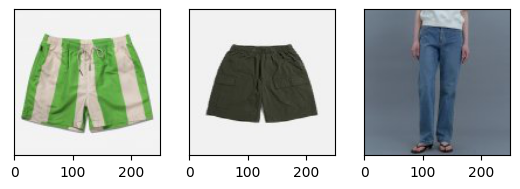

In [ ]:
# 데이터 형태 확인
i = 1
for f in list_ds.take(3):
  img = image.load_img(f.numpy(), target_size=(250, 250))
  plt.subplot(1,3,i)
  plt.gca().axes.yaxis.set_visible(False)
  plt.imshow(img)
  i += 1

# 데이터 셋 제작

In [ ]:
batch_size = 32
img_height = 100
img_width = 100

In [ ]:
# train 데이터 셋 제작
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  label_mode="int", # 4개의 데이터 레이블을 integer로 저장하도록 설정!
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8479 files belonging to 4 classes.
Using 6784 files for training.


In [ ]:
# validation 데이터 셋 제작
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  label_mode="int", # 4개의 데이터 레이블을 integer로 저장하도록 설정!
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8479 files belonging to 4 classes.
Using 1695 files for validation.


In [ ]:
# 클래스 명 확인
class_names = train_ds.class_names
print(class_names)

['바지', '상의', '신발', '아우터']


In [ ]:
# 클래스 수 저장
num_classes = len(class_names)

# CNN 모델링
### 이미지 데이터 형식을 고려하여 CNN으로 모델을 설정

In [ ]:
# 초기 모델
model = models.Sequential()
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # softmax 선택 이유: 클래스가 2개 이상이므로 softmax를 사용

In [ ]:
model.build((32,100, 100, 3))

In [ ]:
# 모델 정보
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (32, 100, 100, 3)         0         
                                                                 
 conv2d_35 (Conv2D)          (32, 98, 98, 32)          896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (32, 49, 49, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (32, 47, 47, 64)          18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (32, 23, 23, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (32, 21, 21, 32)         

In [ ]:
model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 클래스를 int로 저장하여 SparseCategorical Crossentropy 사용
  metrics= keras.metrics.SparseCategoricalAccuracy()) # 클래스를 int로 저장하여 SparseCategoricalAccuracy() 사용

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
212/212 [==============================] - 15s 53ms/step - loss: 0.6135 - sparse_categorical_accuracy: 0.7715 - val_loss: 0.3953 - val_sparse_categorical_accuracy: 0.8425
Epoch 2/10
212/212 [==============================] - 11s 52ms/step - loss: 0.3269 - sparse_categorical_accuracy: 0.8769 - val_loss: 0.3941 - val_sparse_categorical_accuracy: 0.8537
Epoch 3/10
212/212 [==============================] - 11s 50ms/step - loss: 0.2362 - sparse_categorical_accuracy: 0.9117 - val_loss: 0.2963 - val_sparse_categorical_accuracy: 0.8932
Epoch 4/10
212/212 [==============================] - 12s 55ms/step - loss: 0.1693 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.2753 - val_sparse_categorical_accuracy: 0.9062
Epoch 5/10
212/212 [==============================] - 12s 56ms/step - loss: 0.1234 - sparse_categorical_accuracy: 0.9517 - val_loss: 0.2999 - val_sparse_categorical_accuracy: 0.9121
Epoch 6/10
212/212 [==============================] - 12s 57ms/step - loss: 0.0966 - spars

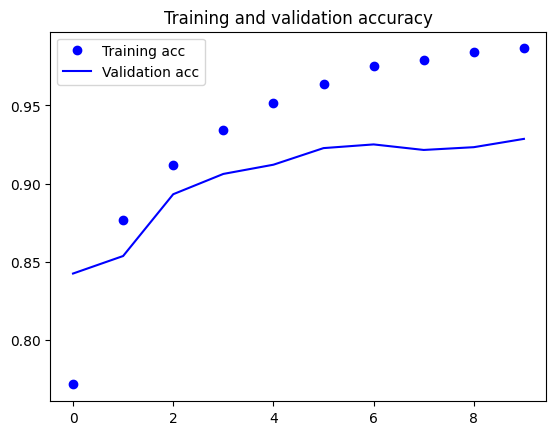

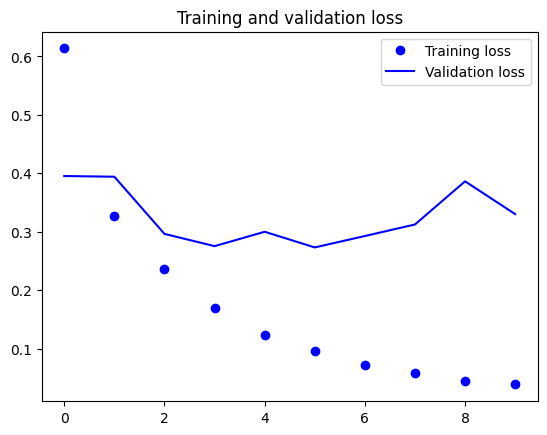

In [ ]:
# 결과 플랏
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 트레이닝 accuracy는 계속 오르는 반면, validation accuracy는 epoch 2를 기점으로 완만해지는 경향을 보인다. 따라서 overfitting이 일어난 것으로 추정이 된다.



# Deep wise하게 CNN 모델을 build할 경우 simulation

In [ ]:
ACC = []

for j in range(3):
  if j == 0:
    print("3-Conv model is running")
    model = models.Sequential()
    model.add(layers.Rescaling(1./255))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax')) # softmax 선택 이유: 클래스가 2개 이상이므로 softmax를 사용
  elif j == 1:
    print("4-Conv model is running")
    model = models.Sequential()
    model.add(layers.Rescaling(1./255))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax')) # softmax 선택 이유: 클래스가 2개 이상이므로 softmax를 사용
  else:
    print("5-Conv model is running")
    model = models.Sequential()
    model.add(layers.Rescaling(1./255))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax')) # softmax 선택 이유: 클래스가 2개 이상이므로 softmax를 사용

  model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 클래스를 int로 저장하여 SparseCategorical Crossentropy 사용
  metrics= keras.metrics.SparseCategoricalAccuracy()) # 클래스를 int로 저장하여 SparseCategoricalAccuracy() 사용

  history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10)

  ACC.append(history.history)


3-Conv model is running
Epoch 1/10
212/212 [==============================] - 13s 53ms/step - loss: 0.6590 - sparse_categorical_accuracy: 0.7440 - val_loss: 0.4583 - val_sparse_categorical_accuracy: 0.8159
Epoch 2/10
212/212 [==============================] - 11s 53ms/step - loss: 0.3754 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.3228 - val_sparse_categorical_accuracy: 0.8720
Epoch 3/10
212/212 [==============================] - 11s 52ms/step - loss: 0.2706 - sparse_categorical_accuracy: 0.8937 - val_loss: 0.2797 - val_sparse_categorical_accuracy: 0.8956
Epoch 4/10
212/212 [==============================] - 18s 82ms/step - loss: 0.2113 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.2839 - val_sparse_categorical_accuracy: 0.9027
Epoch 5/10
212/212 [==============================] - 15s 68ms/step - loss: 0.1655 - sparse_categorical_accuracy: 0.9354 - val_loss: 0.3012 - val_sparse_categorical_accuracy: 0.9032
Epoch 6/10
212/212 [==============================] - 14s 66ms/ste

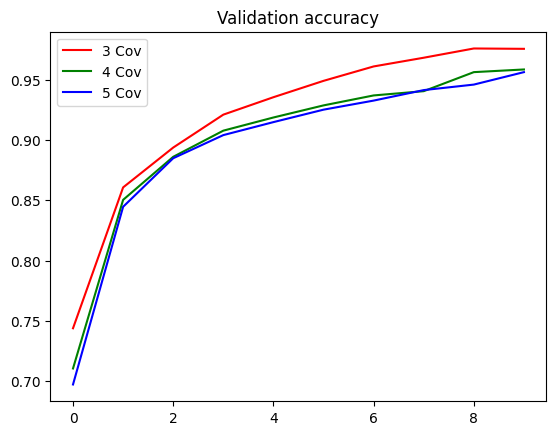

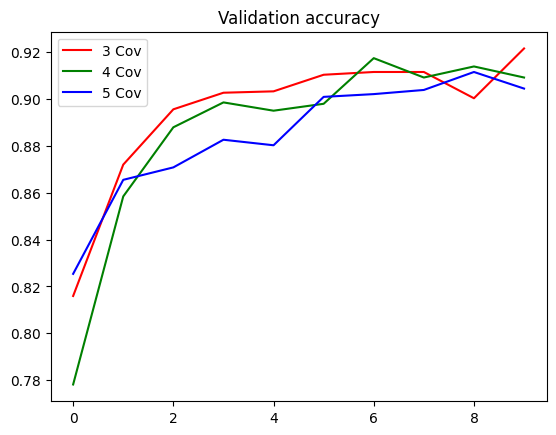

In [ ]:
epochs = range(len(ACC[0]['val_sparse_categorical_accuracy']))

plt.plot(epochs, ACC[0]['sparse_categorical_accuracy'], 'r', label='3 Cov')
plt.plot(epochs, ACC[1]['sparse_categorical_accuracy'], 'g', label='4 Cov')
plt.plot(epochs, ACC[2]['sparse_categorical_accuracy'], 'b', label='5 Cov')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, ACC[0]['val_sparse_categorical_accuracy'], 'r', label='3 Cov')
plt.plot(epochs, ACC[1]['val_sparse_categorical_accuracy'], 'g', label='4 Cov')
plt.plot(epochs, ACC[2]['val_sparse_categorical_accuracy'], 'b', label='5 Cov')
plt.title('Validation accuracy')
plt.legend()

plt.show();

### 모델을 deep하게 쌓을 수록 Accuracy가 더 줄어드는 모습을 보임. 그러나 Deep한 모델일 수록 파라미터의 수 또한 기하급수적으로 줄어듦. 즉, 미미한 Accuracy의 차이가 있지만, deep하게 쌓을 수록 파라미터의 연산량을 매우 크게 줄일 수 있음. 즉, efficient하게 classify할 수 있음을 보여줌.
### 또한, Deep하게 쌓았음에도 성능이 좋아지지는 않는 것으로 보아 overffiting 문제가 발생했을 가능성이 보임.

# 이미지 데이터를 Feedforward 모델에 적용

In [ ]:
FF_model = models.Sequential()
FF_model.add(layers.Rescaling(1./255))
FF_model.add(layers.Flatten()) # 이미지를 Feedforward 모델에 학습시키기 위해 flatten 시켜서 전달해 주었다.
FF_model.add(layers.Dense(64, activation='relu'))
FF_model.add(layers.Dense(64, activation='relu'))
FF_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
FF_model.build((32,100, 100, 3))

In [ ]:
# FF 모델 정보
FF_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 100, 100, 3)         0         
                                                                 
 flatten (Flatten)           (32, 30000)               0         
                                                                 
 dense (Dense)               (32, 64)                  1920064   
                                                                 
 dense_1 (Dense)             (32, 64)                  4160      
                                                                 
 dense_2 (Dense)             (32, 10)                  650       
                                                                 
Total params: 1,924,874
Trainable params: 1,924,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
FF_model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics= keras.metrics.SparseCategoricalAccuracy())

In [ ]:
FF_history = FF_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10)

Epoch 1/10
212/212 [==============================] - 23s 55ms/step - loss: 2.0724 - sparse_categorical_accuracy: 0.5410 - val_loss: 1.1144 - val_sparse_categorical_accuracy: 0.6124
Epoch 2/10
212/212 [==============================] - 11s 50ms/step - loss: 1.0159 - sparse_categorical_accuracy: 0.6623 - val_loss: 0.9103 - val_sparse_categorical_accuracy: 0.6791
Epoch 3/10
212/212 [==============================] - 10s 47ms/step - loss: 0.8256 - sparse_categorical_accuracy: 0.6997 - val_loss: 1.0216 - val_sparse_categorical_accuracy: 0.6472
Epoch 4/10
212/212 [==============================] - 10s 46ms/step - loss: 0.7909 - sparse_categorical_accuracy: 0.7084 - val_loss: 0.9064 - val_sparse_categorical_accuracy: 0.6968
Epoch 5/10
212/212 [==============================] - 11s 53ms/step - loss: 0.7698 - sparse_categorical_accuracy: 0.7229 - val_loss: 0.8046 - val_sparse_categorical_accuracy: 0.6619
Epoch 6/10
212/212 [==============================] - 11s 50ms/step - loss: 0.8142 - spars

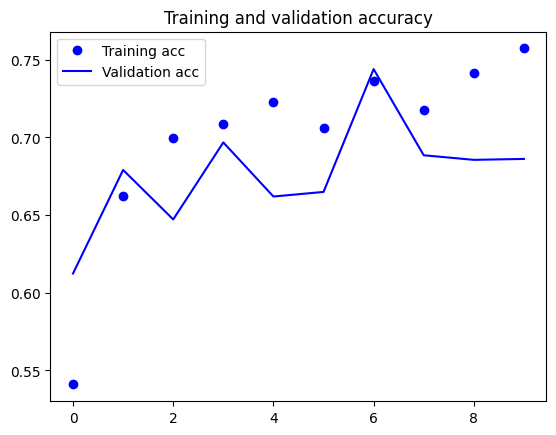

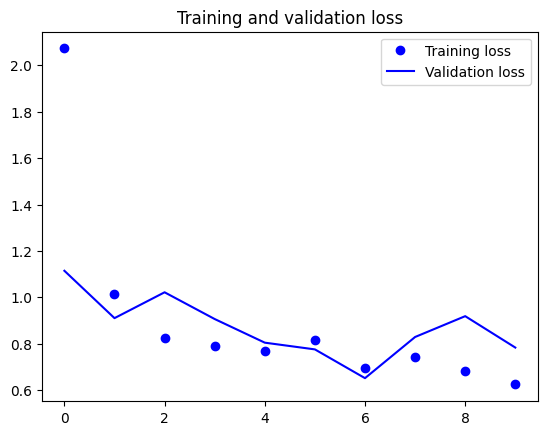

In [ ]:
# Feed forward 결과 플랏
acc = FF_history.history['sparse_categorical_accuracy']
val_acc = FF_history.history['val_sparse_categorical_accuracy']
loss = FF_history.history['loss']
val_loss = FF_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### CNN모델과 다르게 epoch 6을 기점으로 validation loss가 늘어나는 것을 확인할 수 있음.CNN보다 학습 시간이 더 걸린다는 것으로 해석됨.또한, 값이 불규칙하게 튀는 것을 보아 이전 학습 input 데이터에 영향을 받지 않는 FF 모델의 특징이 드러남.

# Deep wise하게 FF 모델을 build할 경우 simulation

In [ ]:
ACC = []

for j in range(3):
  if j == 0:
    print("3-Dense model is running")
    FF_model = models.Sequential()
    FF_model.add(layers.Rescaling(1./255))
    FF_model.add(layers.Flatten()) # 이미지를 Feedforward 모델에 학습시키기 위해 flatten 시켜서 전달해 주었다.
    FF_model.add(layers.Dense(64, activation='relu'))
    FF_model.add(layers.Dense(64, activation='relu'))
    FF_model.add(layers.Dense(10, activation='softmax'))
  elif j == 1:
    print("4-Dense model is running")
    FF_model = models.Sequential()
    FF_model.add(layers.Rescaling(1./255))
    FF_model.add(layers.Flatten())
    FF_model.add(layers.Dense(64, activation='relu'))
    FF_model.add(layers.Dense(64, activation='relu'))
    FF_model.add(layers.Dense(64, activation='relu'))
    FF_model.add(layers.Dense(10, activation='softmax'))
  else:
    print("5-Dense model is running")
    FF_model = models.Sequential()
    FF_model.add(layers.Rescaling(1./255))
    FF_model.add(layers.Flatten())
    FF_model.add(layers.Dense(64, activation='relu'))
    FF_model.add(layers.Dense(64, activation='relu'))
    FF_model.add(layers.Dense(64, activation='relu'))
    FF_model.add(layers.Dense(64, activation='relu'))
    FF_model.add(layers.Dense(10, activation='softmax'))

  FF_model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics= keras.metrics.SparseCategoricalAccuracy())

  FF_history = FF_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10)

  ACC.append(FF_history.history)


3-Dense model is running
Epoch 1/10
212/212 [==============================] - 13s 55ms/step - loss: 1.8331 - sparse_categorical_accuracy: 0.5358 - val_loss: 1.0466 - val_sparse_categorical_accuracy: 0.6065
Epoch 2/10
212/212 [==============================] - 11s 49ms/step - loss: 0.8808 - sparse_categorical_accuracy: 0.6641 - val_loss: 0.7705 - val_sparse_categorical_accuracy: 0.6873
Epoch 3/10
212/212 [==============================] - 11s 49ms/step - loss: 0.7241 - sparse_categorical_accuracy: 0.7236 - val_loss: 0.7260 - val_sparse_categorical_accuracy: 0.7333
Epoch 4/10
212/212 [==============================] - 10s 48ms/step - loss: 0.7079 - sparse_categorical_accuracy: 0.7274 - val_loss: 0.6909 - val_sparse_categorical_accuracy: 0.7499
Epoch 5/10
212/212 [==============================] - 10s 47ms/step - loss: 0.7394 - sparse_categorical_accuracy: 0.7177 - val_loss: 0.9785 - val_sparse_categorical_accuracy: 0.6761
Epoch 6/10
212/212 [==============================] - 10s 47ms/st

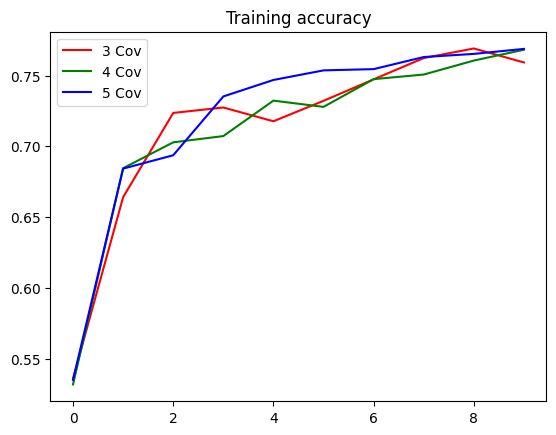

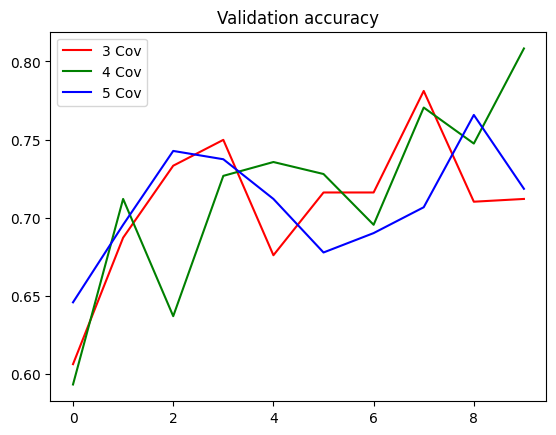

In [ ]:
epochs = range(len(ACC[0]['val_sparse_categorical_accuracy']))

plt.plot(epochs, ACC[0]['sparse_categorical_accuracy'], 'r', label='3 Cov')
plt.plot(epochs, ACC[1]['sparse_categorical_accuracy'], 'g', label='4 Cov')
plt.plot(epochs, ACC[2]['sparse_categorical_accuracy'], 'b', label='5 Cov')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, ACC[0]['val_sparse_categorical_accuracy'], 'r', label='3 Cov')
plt.plot(epochs, ACC[1]['val_sparse_categorical_accuracy'], 'g', label='4 Cov')
plt.plot(epochs, ACC[2]['val_sparse_categorical_accuracy'], 'b', label='5 Cov')
plt.title('Validation accuracy')
plt.legend()

plt.show();

### 결과를 보면, FF모델에서 Dense layer의 개수는 모델의 성능에 큰 영향을 주는 것으로 보이지 않음. Train Accuracy는 계속해서 증가하는 추세를 보이는 반면, Validation Accuracy는 진동하는 꼴을 띔. 즉, 학습이 제대로 이루어지지 않는 것으로 보임.

### ==> 즉, 이미지를 학습시킬 때에는 CNN모델을 사용하는 것이 효과적인 학습법으로 보임

# CNN모델 upgrade

### 기존의 3-Conv CNN을 바탕으로 overfitting 문제 해결을 위한 regularization 방안 적용

In [ ]:
# L2 regularization penalty 모델
L2_model = models.Sequential()
L2_model.add(layers.Rescaling(1./255))
L2_model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
L2_model.add(layers.MaxPooling2D(2,2))
L2_model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
L2_model.add(layers.MaxPooling2D((2, 2)))
L2_model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
L2_model.add(layers.Flatten())
L2_model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
L2_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
L2_model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics= keras.metrics.SparseCategoricalAccuracy())

In [ ]:
L2_history = L2_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
212/212 [==============================] - 15s 59ms/step - loss: 0.8373 - sparse_categorical_accuracy: 0.7319 - val_loss: 0.5494 - val_sparse_categorical_accuracy: 0.8242
Epoch 2/10
212/212 [==============================] - 15s 68ms/step - loss: 0.5150 - sparse_categorical_accuracy: 0.8536 - val_loss: 0.5217 - val_sparse_categorical_accuracy: 0.8507
Epoch 3/10
212/212 [==============================] - 10s 48ms/step - loss: 0.4303 - sparse_categorical_accuracy: 0.8841 - val_loss: 0.4606 - val_sparse_categorical_accuracy: 0.8696
Epoch 4/10
212/212 [==============================] - 12s 55ms/step - loss: 0.3924 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.4097 - val_sparse_categorical_accuracy: 0.8944
Epoch 5/10
212/212 [==============================] - 12s 56ms/step - loss: 0.3490 - sparse_categorical_accuracy: 0.9120 - val_loss: 0.4034 - val_sparse_categorical_accuracy: 0.9027
Epoch 6/10
212/212 [==============================] - 11s 52ms/step - loss: 0.3253 - spars

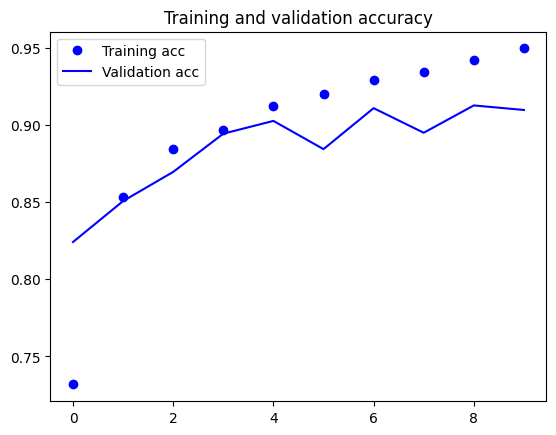

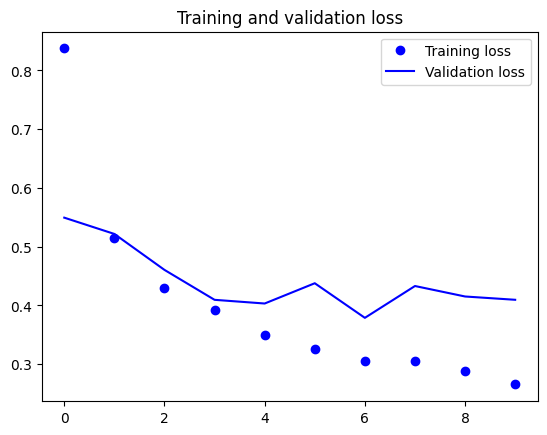

In [ ]:
# 결과 플랏
acc = L2_history.history['sparse_categorical_accuracy']
val_acc = L2_history.history['val_sparse_categorical_accuracy']
loss = L2_history.history['loss']
val_loss = L2_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### L2 페널티를 적용한 경우 Validation Loss가 눈에 띄게 하향세로 전환된 것을 확인할 수 있음. 여기에 추가적으로 drop out을 적용하여 유의미한 영향이 있는지 확인해 볼 것.

# Drop out

In [ ]:
# Drop out 모델
Drop_model = models.Sequential()
Drop_model.add(layers.Rescaling(1./255))
Drop_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
Drop_model.add(layers.MaxPooling2D(2,2))
Drop_model.add(layers.Dropout(0.5))
Drop_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
Drop_model.add(layers.MaxPooling2D((2, 2)))
Drop_model.add(layers.Dropout(0.5))
Drop_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
Drop_model.add(layers.Flatten())
Drop_model.add(layers.Dense(64, activation='relu'))
Drop_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
Drop_model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics= keras.metrics.SparseCategoricalAccuracy())

In [ ]:
Drop_history = Drop_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
212/212 [==============================] - 17s 63ms/step - loss: 0.8657 - sparse_categorical_accuracy: 0.6477 - val_loss: 0.5533 - val_sparse_categorical_accuracy: 0.7858
Epoch 2/10
212/212 [==============================] - 17s 79ms/step - loss: 0.4775 - sparse_categorical_accuracy: 0.8241 - val_loss: 0.4535 - val_sparse_categorical_accuracy: 0.8401
Epoch 3/10
212/212 [==============================] - 12s 54ms/step - loss: 0.3646 - sparse_categorical_accuracy: 0.8588 - val_loss: 0.3300 - val_sparse_categorical_accuracy: 0.8726
Epoch 4/10
212/212 [==============================] - 11s 53ms/step - loss: 0.2992 - sparse_categorical_accuracy: 0.8855 - val_loss: 0.3182 - val_sparse_categorical_accuracy: 0.8826
Epoch 5/10
212/212 [==============================] - 11s 50ms/step - loss: 0.2578 - sparse_categorical_accuracy: 0.8978 - val_loss: 0.2700 - val_sparse_categorical_accuracy: 0.9074
Epoch 6/10
212/212 [==============================] - 12s 55ms/step - loss: 0.2246 - spars

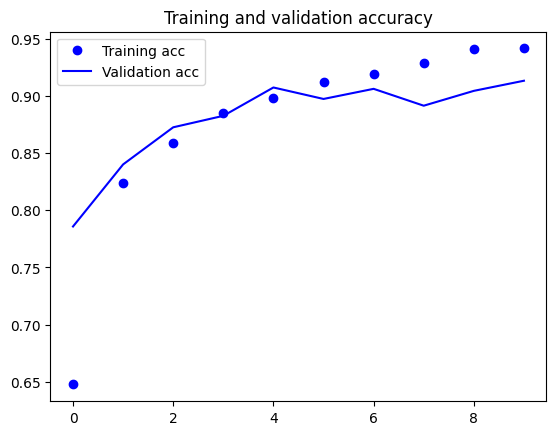

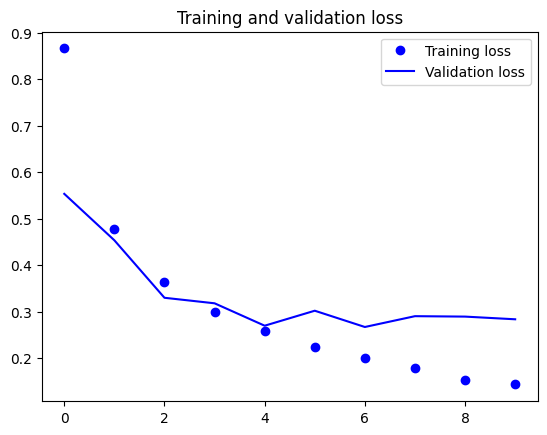

In [ ]:
# 결과 플랏
acc = Drop_history.history['sparse_categorical_accuracy']
val_acc = Drop_history.history['val_sparse_categorical_accuracy']
loss = Drop_history.history['loss']
val_loss = Drop_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Drop out의 경우도 L2 패널티를 적용했을 경우와 마찬가지로 눈에 띄는 효과가 보임. Vlidation Loss가 기존 모델에 비해 하향세로 전환된 것을 확인할 수 있음.

# L2 패널티 + Drop out

In [ ]:
# L2 + Drop out
L2D_model = models.Sequential()
L2D_model.add(layers.Rescaling(1./255))
L2D_model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
L2D_model.add(layers.MaxPooling2D(2,2))
L2D_model.add(layers.Dropout(0.5))
L2D_model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
L2D_model.add(layers.MaxPooling2D((2, 2)))
L2D_model.add(layers.Dropout(0.5))
L2D_model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
L2D_model.add(layers.Flatten())
L2D_model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
L2D_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
L2D_model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics= keras.metrics.SparseCategoricalAccuracy())

In [ ]:
L2D_history = L2D_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
212/212 [==============================] - 17s 68ms/step - loss: 1.1945 - sparse_categorical_accuracy: 0.6097 - val_loss: 0.8162 - val_sparse_categorical_accuracy: 0.7959
Epoch 2/10
212/212 [==============================] - 12s 55ms/step - loss: 0.6692 - sparse_categorical_accuracy: 0.8042 - val_loss: 0.7537 - val_sparse_categorical_accuracy: 0.8383
Epoch 3/10
212/212 [==============================] - 12s 54ms/step - loss: 0.5461 - sparse_categorical_accuracy: 0.8420 - val_loss: 0.4987 - val_sparse_categorical_accuracy: 0.8684
Epoch 4/10
212/212 [==============================] - 13s 58ms/step - loss: 0.4614 - sparse_categorical_accuracy: 0.8694 - val_loss: 0.4572 - val_sparse_categorical_accuracy: 0.8755
Epoch 5/10
212/212 [==============================] - 12s 54ms/step - loss: 0.4183 - sparse_categorical_accuracy: 0.8844 - val_loss: 0.4113 - val_sparse_categorical_accuracy: 0.8985
Epoch 6/10
212/212 [==============================] - 12s 53ms/step - loss: 0.4002 - spars

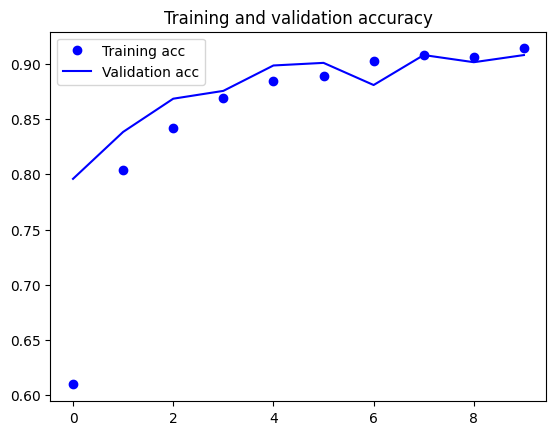

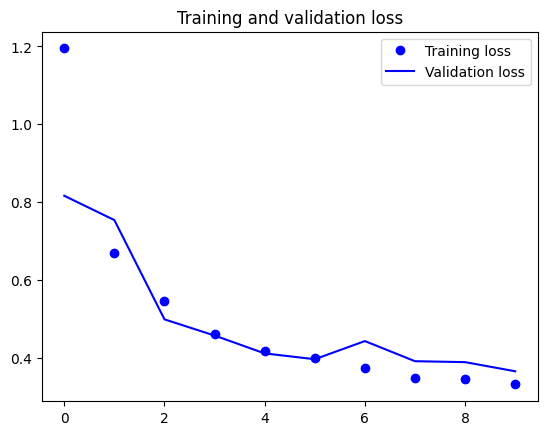

In [ ]:
# 결과 플랏
acc = L2D_history.history['sparse_categorical_accuracy']
val_acc = L2D_history.history['val_sparse_categorical_accuracy']
loss = L2D_history.history['loss']
val_loss = L2D_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### L2 패널티와 Drop out을 함께 적용한 결과, 한 개의 regularization 방안을 적용하였을 경우보다 훨씬 좋아진 성능을 보임!

# Visualization convet filters

In [ ]:
# 테스트에 사용할 이미지 다운
img_path = keras.utils.get_file(
    fname="62c68e2acc155ba4417850a8c099111353c55eee91ba686b35e84caed4eb.jpg",
    origin="https://thumbnail9.coupangcdn.com/thumbnails/remote/492x492ex/image/vendor_inventory/9ecd/62c68e2acc155ba4417850a8c099111353c55eee91ba686b35e84caed4eb.jpg"
    # fname="775ca2a8bf1008726bbb1924d0dae4ca.jpg",
    # origin="https://www.leekorea.co.kr/web/product/medium/202303/775ca2a8bf1008726bbb1924d0dae4ca.jpg")
)

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(100, 100))

44696/44696 [==============================] - 0s 0us/step


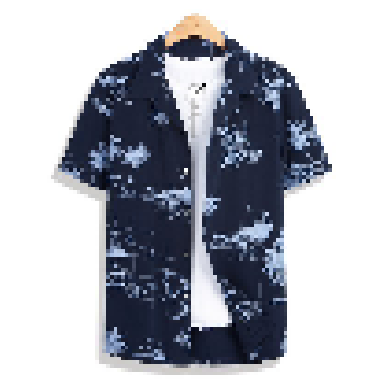

In [ ]:
# 다운받은 이미지 시각화
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [ ]:
layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 1s 605ms/step


In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 98, 98, 32)


### 첫 레이어에서 활성화되는 부분

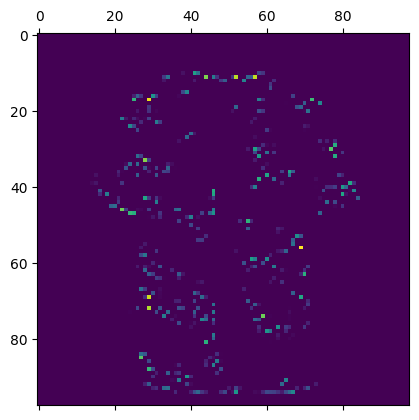

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")

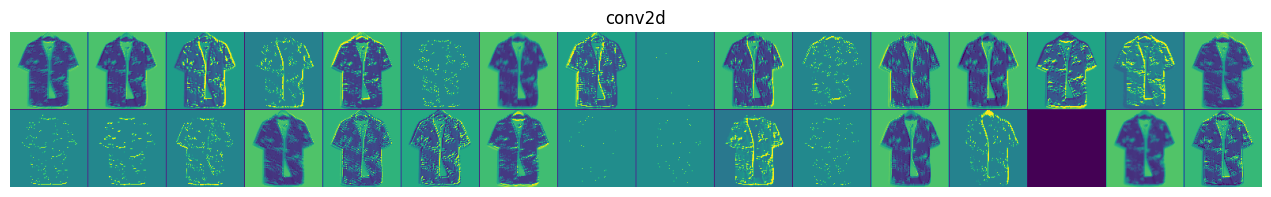

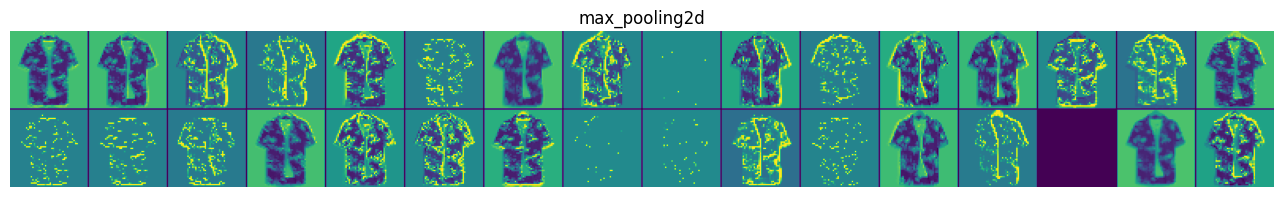

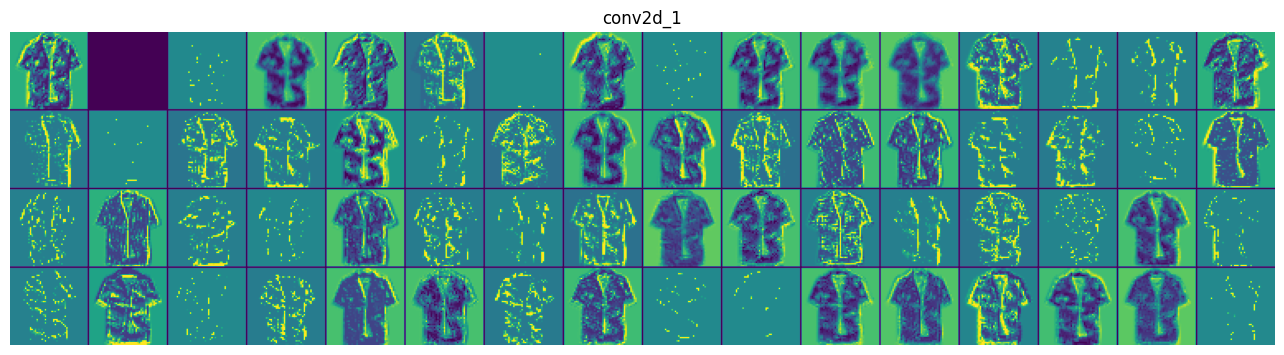

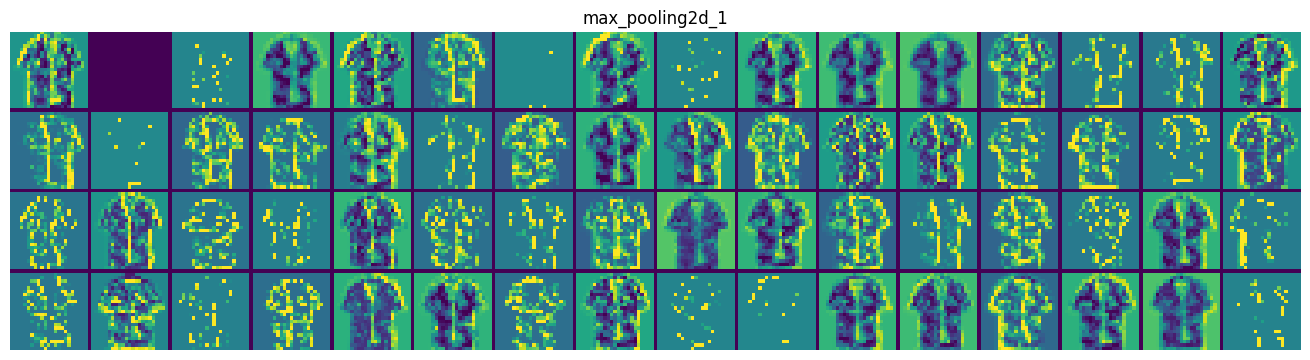

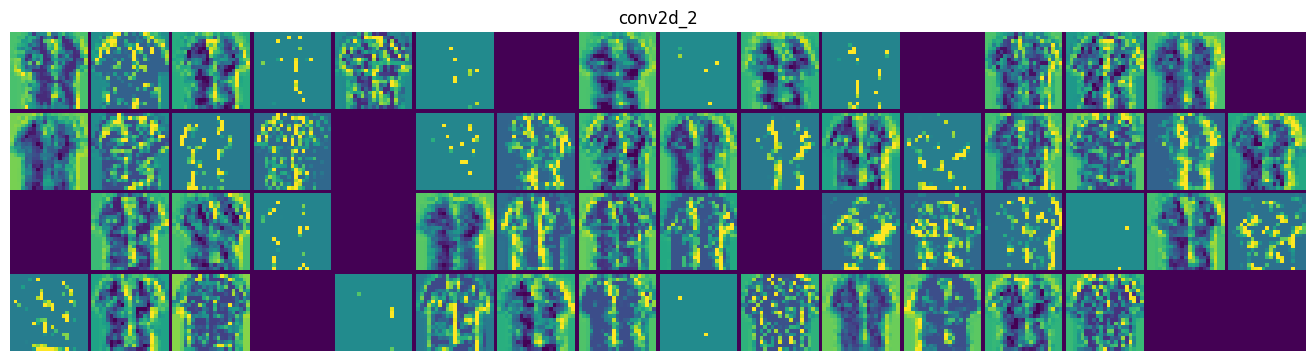

In [ ]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                             images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")

### 레이어가 깊어갈 수록 추상화되는 것을 확인할 수 있음

### 히트맵 생성

In [ ]:
# convolutional layer 이름 확인
for layer in model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)

conv2d
conv2d_1
conv2d_2


In [ ]:
layer_name = "conv2d"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

In [ ]:
activation = feature_extractor(
    keras.applications.xception.preprocess_input(img_tensor)
)

In [ ]:
def compute_loss(image, filter_index):
    activation = feature_extractor(image)
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

In [ ]:
@tf.function
def gradient_ascent_step(image, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = compute_loss(image, filter_index)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += learning_rate * grads
    return image

In [ ]:
img_width = 100
img_height = 100

def generate_filter_pattern(filter_index):
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform(
        minval=0.4,
        maxval=0.6,
        shape=(1, img_width, img_height, 3))
    for i in range(iterations):
        image = gradient_ascent_step(image, filter_index, learning_rate)
    return image[0].numpy()

In [ ]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :]
    return image

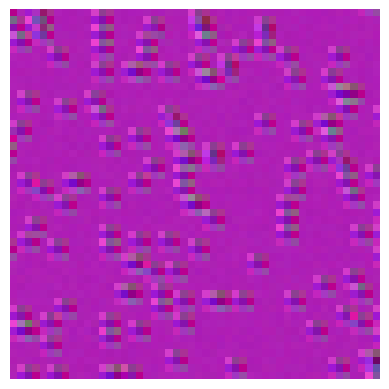

In [ ]:
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=2)))

In [ ]:
all_images = []
for filter_index in range(32):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(
        generate_filter_pattern(filter_index)
    )
    all_images.append(image)

margin = 5
n = 5
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image

keras.utils.save_img(
    f"filters_for_layer_{layer_name}.png", stitched_filters)

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31


In [ ]:
last_conv_layer_name = "conv2d_2"
classifier_layer_names =["flatten","dense", "dense_1"]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [ ]:
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [ ]:
img_array = get_img_array(img_path, target_size=(100, 100))

In [ ]:
with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(img_array)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    print(tf.argmax(preds[0]))
    top_pred_index = tf.argmax(preds[0])
    print(top_pred_index)
    top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)


In [ ]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

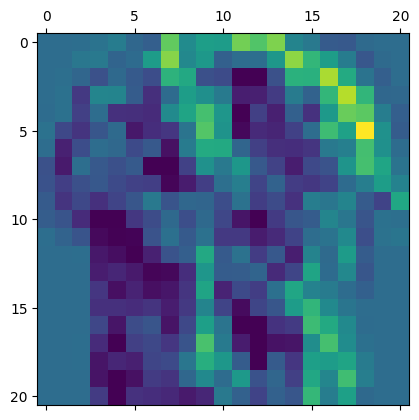

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [ ]:
import matplotlib.cm as cm

img = keras.utils.load_img(img_path)
img = keras.utils.img_to_array(img)

heatmap = np.uint8(255 * heatmap)

jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.utils.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.utils.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.utils.array_to_img(superimposed_img)

save_path = "black_shirts.jpg"
superimposed_img.save(save_path)

<ipython-input-31-197efb1bbe31>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


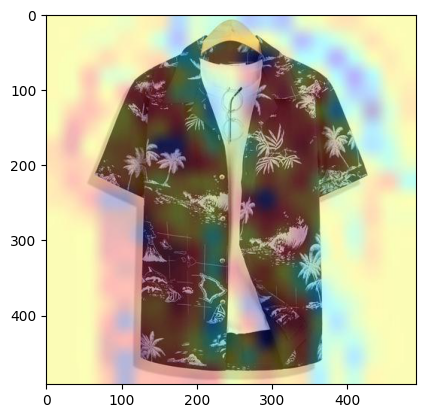

In [ ]:
heat_img = plt.imread("/content/gdrive/MyDrive/Deep_Project/black_shirts.jpg")
plt.imshow(heat_img)
plt.show()